In [16]:
import pandas as pd
import numpy as n
import seaborn as sn

In [6]:
rap = pd.read_csv('rap_search.csv')



In [7]:
rap

,Week,cardi b album,Nicki Minaj album
0,2022-01-30,7,13
1,2022-02-06,3,14
2,2022-02-13,6,8
3,2022-02-20,5,9
4,2022-02-27,5,11
5,2022-03-06,4,7
6,2022-03-13,4,11
7,2022-03-20,8,8
8,2022-03-27,7,8
9,2022-04-03,8,8


In [9]:
rap.head()

,Week,cardi b album,Nicki Minaj album
0,2022-01-30,7,13
1,2022-02-06,3,14
2,2022-02-13,6,8
3,2022-02-20,5,9
4,2022-02-27,5,11


In [10]:
rap.tail()

,Week,cardi b album,Nicki Minaj album
47,2022-12-25,17,5
48,2023-01-01,6,8
49,2023-01-08,9,8
50,2023-01-15,5,4
51,2023-01-22,6,8


In [11]:
rap.describe()

,cardi b album,Nicki Minaj album
count,52.000000,52.000000
mean,8.865385,8.673077
std,13.869177,3.473830
min,0.000000,3.000000
25%,4.750000,7.000000
50%,6.000000,8.000000
75%,8.250000,10.000000
max,100.000000,21.000000


In [13]:
#Convert data into numpy array
Rap = rap.to_numpy()
Rap

array([['2022-01-30', 7, 13],
       ['2022-02-06', 3, 14],
       ['2022-02-13', 6, 8],
       ['2022-02-20', 5, 9],
       ['2022-02-27', 5, 11],
       ['2022-03-06', 4, 7],
       ['2022-03-13', 4, 11],
       ['2022-03-20', 8, 8],
       ['2022-03-27', 7, 8],
       ['2022-04-03', 8, 8],
       ['2022-04-10', 6, 8],
       ['2022-04-17', 0, 7],
       ['2022-04-24', 6, 9],
       ['2022-05-01', 6, 6],
       ['2022-05-08', 6, 6],
       ['2022-05-15', 6, 7],
       ['2022-05-22', 0, 7],
       ['2022-05-29', 12, 8],
       ['2022-06-05', 4, 8],
       ['2022-06-12', 6, 8],
       ['2022-06-19', 3, 7],
       ['2022-06-26', 7, 4],
       ['2022-07-03', 15, 8],
       ['2022-07-10', 4, 8],
       ['2022-07-17', 4, 15],
       ['2022-07-24', 11, 10],
       ['2022-07-31', 12, 11],
       ['2022-08-07', 5, 17],
       ['2022-08-14', 1, 9],
       ['2022-08-21', 5, 14],
       ['2022-08-28', 7, 21],
       ['2022-09-04', 8, 8],
       ['2022-09-11', 10, 9],
       ['2022-09-18', 9, 6],

In [14]:
#Function for tidying data
def tidyMyData(filename) :
    '''
    tidyMyData() Takes one-column-per-cell rat reaction time data as input.
    Returns tidy one-column-per-variable data.
    User specifies a filename string.
    '''
    
    import pandas as pd
    import numpy as np
    import seaborn as sn

    my_input_data = pd.read_csv(filename)  # read the data

    raw_data = my_input_data.to_numpy()                      # convert to numpy array

    obs, grps = raw_data.shape                               # get the number of rows and columns

    new_length = obs*grps                                    # compute total number of observations

    values_col = np.reshape(raw_data, (new_length, 1), 
                            order = 'F')                     # reshape the array
    values_col = np.squeeze(values_col)                      # squeeze to make 1D

    # construct the inner grouping variable
    sexes = pd.Series(['male', 'female'])                    # define the levels
    sexes = sexes.repeat(obs)                                # make one cycle of the levels
    sexes = pd.concat([sexes]*2, ignore_index=True)     # and repeat the cycle, ditching the indexes

    # construct the outer grouping variable
    strain = pd.Series(['wildtype', 'mutant'])               # define the levels
    strain = strain.repeat(2*obs)                            # make the one cycle
    strain = strain.reset_index(drop=True)                   # drop the pesky index

    # construct the data frame
    my_new_tidy_data = pd.DataFrame(
        {
            "RTs": values_col,                               # make a column named RTs and put the values in
            "sex": sexes,                                    # ditto for sex
            "strain": strain                                 # and for genetic strain
        }    
    )
    
    return my_new_tidy_data

Distribution Plots using seaborn

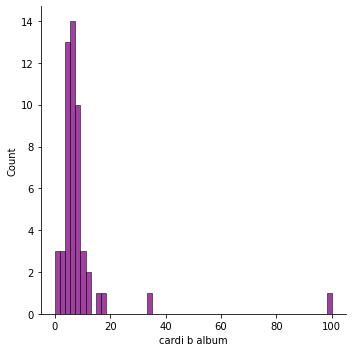

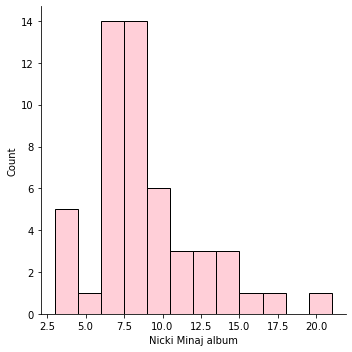

In [22]:
cardiDist = sn.displot(x = 'cardi b album', data = rap, color = 'purple');
nickiDist = sn.displot(x = 'Nicki Minaj album', data = rap, color = 'pink')

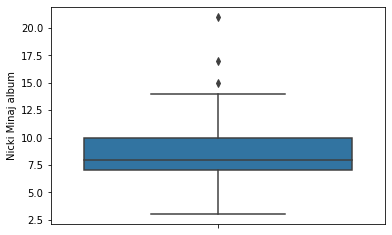

In [26]:
nickiBox = sn.boxplot(y = "Nicki Minaj album", data = rap);


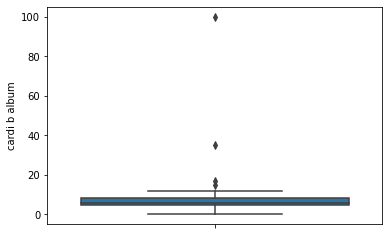

In [27]:
cardibBox = sn.boxplot(y = "cardi b album", data = rap);